# Fetch - Data Analyst Take Home

## 1 - Data Exploration
Review the unstructured csv files and answer the following questions with code that supports your conclusions:
 - Are there any data quality issues present?
 - Are there any fields that are challenging to understand?

In [1]:
#I will primarily use Pandas dataframes for this assignment.
#Load packages
import pandas as pd
import numpy as np

In [2]:
#Read data into dataframes
products=pd.read_csv("PRODUCTS_TAKEHOME.csv", dtype={'BARCODE':str}) #load barcode as string because of leading 0s
users=pd.read_csv("USER_TAKEHOME.csv")
transactions=pd.read_csv("TRANSACTION_TAKEHOME.csv", dtype={'BARCODE':str}) #load barcode as string because of leading 0s

In [3]:
products.head()

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,796494407820
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,023278011028
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,461817824225
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,035000466815
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,0806810850459


In [4]:
users.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female


In [5]:
transactions.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,015300014978,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,078742229751,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,783399746536,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,047900501183,1.00,


In [6]:
#Check uniqueness of user IDs
users['ID'].count()

np.int64(100000)

In [7]:
#unique count matches total count so all user IDs are unique
len(users['ID'].unique())

100000

In [8]:
#check if dates make sense in users
#min(users['CREATED_DATE']) #In 2014
#max(users['CREATED_DATE']) #In 2024
#min(users['BIRTH_DATE'].replace({np.nan: '2025-01-22'})) #'1900-01-01 00:00:00.000 Z'
max(users['BIRTH_DATE'].replace({np.nan: ''})) #Gen Alpha is tech savvy, but probably not this savvy :)

'2022-04-03 07:00:00.000 Z'

In [9]:
#check if dates make sense in transactions
#min(transactions['PURCHASE_DATE']) #In 2024
#max(transactions['PURCHASE_DATE']) #In 2024
#min(transactions['SCAN_DATE']) #June 2024
#max(transactions['SCAN_DATE']) #Sept 2024

## 1 - Answers
<b> Are there any data quality issues present? </b>\
Yes, below is a list:
 - Incomplete or missing data
     - Ex/ Birth date in Users, Barcodes in Transactions, Manufacturer or Brand in Products
 - Type mixing
     - Ex/ Final quantity has 'zero' instead of 0 in Transactions
 - Inaccurate data
     - Ex/ Records with a quantity of zero, but a final sale value that isn't zero in Transactions,\
       Records with a quantity greater than zero, but no final sale value in Transactions,\
       Records with a manufacturer of 'PLACEHOLDER MANUFACTURER' in Products,\
       Records with a birth date that is too recent in Users
 - Empty strings vs NULLs
     - Ex/ Final sale as ' ' in Transactions
 - Potential duplicates
     - Ex/ Dove and Dove Men+Care might be duplicates for Brand in Products 
   
<b> Are there any fields that are challenging to understand? </b>\
Yes, there are. Final quantity and final sale are especially not clear. Is final sale accounting for discounts? Is the amount already multiplied by quantity?


## 2 - SQL Queries
Answer <b>three</b> of the following questions with at least one question coming from the closed-ended and one from the open-ended question set. Each question should be answered using one query.
### Closed-ended questions:
 - <b>What are the top 5 brands by receipts scanned among users 21 and over?</b>
 - <b>What are the top 5 brands by sales among users that have had their account for at least six months?</b>
 - What is the percentage of sales in the Health & Wellness category by generation?
### Open-ended questions:
For these, make assumptions and clearly state them when answering the question.
 - Who are Fetch’s power users?
 - Which is the leading brand in the Dips & Salsa category?
 - <b>At what percent has Fetch grown year over year?</b>

## 2 - Answers
<b>What are the top 5 brands by receipts scanned among users 21 and over?</b>\
Assumptions:
- Consider all receipts by a user that is now 21 or over. Otherwise, we would also need to filter the receipts by what age the user was when the receipt was submitted.
- Consider all the times a brand appears on a receipt in the count, but do not multiply by the product's quantity.

SQL Query:
```
--Calculate the users age
WITH UsersAge AS (
    SELECT
        id,
        birth_date,
        CASE WHEN dateadd(year, datediff (year, birth_date, getdate()), birth_date) > getdate()
            THEN datediff(year, birth_date, getdate()) - 1
            ELSE datediff(year, birth_date, getdate())
       END as age
    FROM Users
),
--Filter to the appropriate data set
FinalSubset AS (
    SELECT
        T.receipt_id,
        P.brand
    INTO #FinalSubset
    FROM Transactions AS T
    INNER JOIN UsersAge as UA 
        ON UA.id = T.user_id
    INNER JOIN Products as P
        ON P.barcode = T.barcode
    WHERE age >=21 --Filter to receipts submitted by users 21 and over
)
SELECT TOP 5
    brand,
    count(*) as receipts
FROM FinalSubset
GROUP BY brand
ORDER BY receipts DESC
;
```

<b>What are the top 5 brands by sales among users that have had their account for at least six months?</b>\
Assumptions:
- Consider all receipts by a user that has now had their account for at least six months.
- Users have just one account.
- The sale column already accounts for discounts and quantity.
- We will not consider products with an unknown barcode/brand. (Otherwise, change the inner join with Products to a left join.)
```
--Filter to the appropriate dataset, aka receipts from users that have had their account for 6+ months
WITH FinalSubset AS (
    SELECT
        P.brand,
        T.sale
    INTO #FinalSubset
    FROM Transactions AS T
    INNER JOIN Users as U
        ON U.id = T.user_id
    INNER JOIN Products as P
        ON P.barcode = T.barcode
    WHERE datediff(day,getdate(),U.created_date) > 180 --Filter to users that have had an account for at least 6 months
)
SELECT TOP 5
    brand,
    SUM(sale) as totalsales
FROM FinalSubset
GROUP BY brand
ORDER BY totalsales DESC
;
```

<b>At what percent has Fetch grown year over year?</b>\
Assumptions:
- The total sales on the receipts don't have an impact on Fetch's growth. Otherwise, it would be worth looking at total sales instead of number of receipts.
- Scan date is more relevant in this case than purchase date.

For this open ended question, I am considering two main metrics to measure Fetch's growth YOY. These two metrics are simple: number of users and number of receipts scanned.

SQL Query
```
-- Get the count of users by sign up year
WITH CTE1 AS (
  SELECT
      datepart(year, created_date) as year,
      count(*) as totalusers
  FROM Users
  GROUP BY datepart(year, created_date)
),
-- Get the count of receipts by scan year (account for the fact Transactions is receipt and product level)
CTE2 AS (
  SELECT
      datepart(year, scan_date) as year,
      COUNT(DISTINCT receipt_id) as totalreceipts
  FROM Transactions
  GROUP BY datepart(year, scan_date)
)
-- Return the results in a way that combines the two main metrics
SELECT
  year,
  totalusers
FROM CTE1
UNION
SELECT
  year,
  totalreceipts
FROM CTE2
order by year
;
```

## 3 - Stakeholder Communication
Construct an email or slack message that is understandable to a product or business leader who is not familiar with your day-to-day work. Summarize the results of your investigation. Include:
 - Key data quality issues and outstanding questions about the data
 - One interesting trend in the data
   - Use a finding from part 2 or come up with a new insight
 - Request for action: explain what additional help, info, etc. you need to make sense of the data and resolve any outstanding issues

## 3 - Answer
For this exercise, I will use insights from the following question: <b>"What are the top 5 brands by sales among users that have had their account for at least six months?"</b>

**Email Subject:** Insights & Next Steps for Top Brands Analysis

Good morning,

I wanted to share an update on the top brands analysis. Here’s a summary of the key insights and next steps:

**Key Insights:**
- Our top 5 brands by sales from June to September 2024 are:  
  1. Coca-Cola  
  2. Annie’s  
  3. Dove  
  4. Barefoot  
  5. Oribe  

<i>[Include below data visualizations here]</i>

**Notes:**
- I’ve filtered for users who have had their account for at least six months, to focus on long-term, engaged customers. Let me know if this timeframe works for you, or if you’d prefer a different period.
- Some products are missing brand or barcode information, so I’ve excluded these from the analysis.


**Next Steps:**
- **Manufacturer vs. Brand**: Would it be valuable to include manufacturers in addition to brands in this analysis? This could give us a more complete view of performance trends across product categories.
- **Data Filters**: Does the six-month filter on user accounts align with your needs? If not, would you prefer a different timeframe or are there other customer segments we should explore?

Once we align on these details, I can refine the analysis and provide a clearer picture of top brand performance.

Thank you!

In [10]:
#Add a column to calculate account age
users["account_age_days"] = (pd.to_datetime(pd.Timestamp.utcnow()) - pd.to_datetime(users['CREATED_DATE'])).dt.days
#Check calculations
#users.head()
#create df with appropriate users filtered
users_atleast_6mo = users.loc[users['account_age_days']>180]

In [11]:
#Merge dataframes and use inner join to filter
#NOTE: This also filters out products with an unknown barcode
transactions_products = transactions.merge(products, how='inner', on='BARCODE')
final_dataset = transactions_products.merge(users_atleast_6mo, how='inner', left_on='USER_ID', right_on='ID')
#final_dataset.head()

In [12]:
#data cleanup
final_dataset['FINAL_QUANTITY'] = final_dataset['FINAL_QUANTITY'].replace("zero",0).astype(float)
final_dataset['FINAL_SALE'] = final_dataset['FINAL_SALE'].replace(" ",0).astype(float)

final_dataset_grouped = final_dataset.groupby("BRAND")["FINAL_SALE"].sum()

<Axes: xlabel='BRAND'>

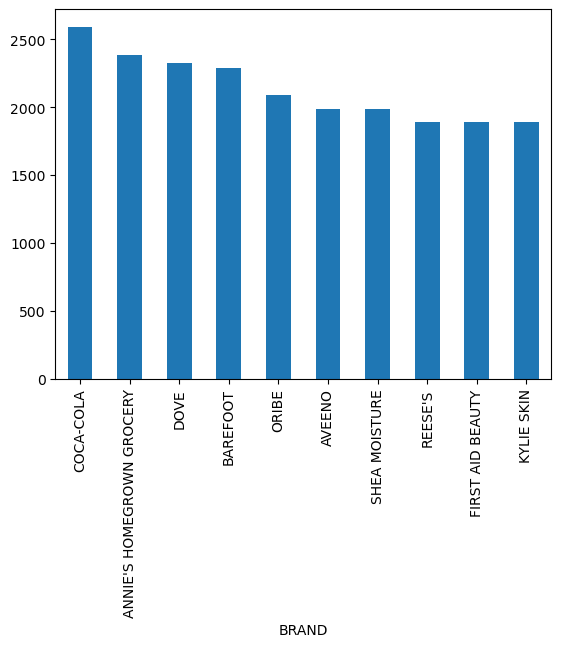

In [13]:
final_dataset_grouped.nlargest(10).plot(kind="bar")